In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Loan Prediction Train - refine.csv")
print(df.head())

    Loan_ID Gender  Married  Dependents     Education  Self_Employed  \
0  LP001002   Male        0         0.0      Graduate            0.0   
1  LP001003   Male        1         1.0      Graduate            0.0   
2  LP001005   Male        1         0.0      Graduate            1.0   
3  LP001006   Male        1         0.0  Not Graduate            0.0   
4  LP001008   Male        0         0.0      Graduate            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         NaN             360.0   
1             4583               1508       128.0             360.0   
2             3000                  0        66.0             360.0   
3             2583               2358       120.0             360.0   
4             6000                  0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  

In [3]:
null_entries = len(df[df.isnull().any(axis=1)])
total_entries = len(df)
print("Total: {}\nNull: {}\n% Nulls: {}\n".format(total_entries,null_entries,round(100*null_entries/total_entries,2)))

print("With these many Nulls, we have to consider doing something because it's too many to ignore\n")

for col in df.columns.values:
    null_entries = len(df[df[col].isnull()])
    total_entries = len(df[col])
    print("{}:\n% Nulls: {}\n".format(col,100*round(null_entries/total_entries,2)))


print("Based on this we will need to see the impact of each feature on the target\n and potentially consider just dropping some of these features")

Total: 614
Null: 134
% Nulls: 21.82

With these many Nulls, we have to consider doing something because it's too many to ignore

Loan_ID:
% Nulls: 0.0

Gender:
% Nulls: 2.0

Married:
% Nulls: 0.0

Dependents:
% Nulls: 2.0

Education:
% Nulls: 0.0

Self_Employed:
% Nulls: 5.0

ApplicantIncome:
% Nulls: 0.0

CoapplicantIncome:
% Nulls: 0.0

LoanAmount:
% Nulls: 4.0

Loan_Amount_Term:
% Nulls: 2.0

Credit_History:
% Nulls: 8.0

Property_Area:
% Nulls: 0.0

Loan_Status:
% Nulls: 0.0

Based on this we will need to see the impact of each feature on the target
 and potentially consider just dropping some of these features


In [4]:
print("For any columns with only 2% Nulls: Fill in the mode\n")

mode_vars = ["Gender", "Dependents","Loan_Amount_Term"]
mode_dict = {}
for var in mode_vars:
    frequencies = df[var].value_counts()
    val = np.argmax(frequencies)
    mode_dict[var] = val

df = df.replace(to_replace=np.nan,value=mode_dict)

for col in mode_vars:
    null_entries = len(df[df[col].isnull()])
    total_entries = len(df[col])
    print("{}:\n% Nulls: {}\n".format(col,100*round(null_entries/total_entries,2)))

For any columns with only 2% Nulls: Fill in the mode

Gender:
% Nulls: 0.0

Dependents:
% Nulls: 0.0

Loan_Amount_Term:
% Nulls: 0.0



In [5]:
print("Since self-employed is a binary variable, we'll just randomly populate the remaining entries\n")

for i in range(0,len(df)):
    if np.isnan(df.iloc[i]["Self_Employed"]):
        val = np.random.choice([float(0),float(1)])
        df.at[(i,"Self_Employed")] = val

null_entries = len(df[df["Self_Employed"].isnull()])
total_entries = len(df["Self_Employed"])
print("{}:\n% Nulls: {}\n".format("Self_Employed",100*round(null_entries/total_entries,2)))

Since self-employed is a binary variable, we'll just randomly populate the remaining entries

Self_Employed:
% Nulls: 0.0



In [6]:
print(set(df["Self_Employed"].values))

{0.0, 1.0}


In [7]:
print("Loan Amount isn't a simple categorical variable, and will likely have an important part in the model\n")
print("We'll fill it in with the average based on education,gender,married,dependents, and self-employed\n")

total_mean = round(df["LoanAmount"].mean())
temp_list = []
for i in range(0,len(df)):
    if np.isnan(df.iloc[i]["LoanAmount"]):
        married = df.iloc[i]["Married"]
        temp = df[df["Married"]==married]
        gender = df.iloc[i]["Gender"]
        temp = temp[temp["Gender"]==gender]
        dependents = df.iloc[i]["Dependents"]
        temp = temp[temp["Dependents"]==dependents]
        education = df.iloc[i]["Education"]
        temp = temp[temp["Education"]==education]
        self = df.iloc[i]["Self_Employed"]
        temp = temp[temp["Self_Employed"]==self]
        if temp.empty or len(temp) == 1:
            df.at[i,"LoanAmount"] = total_mean
        elif len(temp) > 1:
            df.at[i,"LoanAmount"] = round(temp["LoanAmount"].mean(),0)
null_entries = len(df[df["LoanAmount"].isnull()])
total_entries = len(df["LoanAmount"])
print("{}:\n% Nulls: {}\n".format("LoanAmount",100*round(null_entries/total_entries,2)))

Loan Amount isn't a simple categorical variable, and will likely have an import part in the model

We'll fill it in with the average based on education,gender,married,dependents, and self-employed

LoanAmount:
% Nulls: 0.0



In [8]:
for col in df.columns.values:
    null_entries = len(df[df[col].isnull()])
    total_entries = len(df[col])
    print("{}:\n% Nulls: {}\n".format(col,100*round(null_entries/total_entries,2)))

Loan_ID:
% Nulls: 0.0

Gender:
% Nulls: 0.0

Married:
% Nulls: 0.0

Dependents:
% Nulls: 0.0

Education:
% Nulls: 0.0

Self_Employed:
% Nulls: 0.0

ApplicantIncome:
% Nulls: 0.0

CoapplicantIncome:
% Nulls: 0.0

LoanAmount:
% Nulls: 0.0

Loan_Amount_Term:
% Nulls: 0.0

Credit_History:
% Nulls: 8.0

Property_Area:
% Nulls: 0.0

Loan_Status:
% Nulls: 0.0



In [9]:
print("Credit History:\n")

print("Good (1.0)")
arr1 = df[df["Credit_History"]==1.0]
good1 = len(arr1[arr1["Loan_Status"] == 1])
bad1 = len(arr1[arr1["Loan_Status"] == 0])

print("# who had good credit: {}".format(len(arr1)))
print("Subset who got Loan: {}".format(good1))
print(100*round(good1/len(arr1),2))
print("Subset who didn't get Loan: {}".format(bad1))
print(100*round(bad1/len(arr1),2))

print()

print("Bad (0.0)")
arr2 = df[df["Credit_History"]==0.0]
good2 = len(arr2[arr2["Loan_Status"] == 1])
bad2 = len(arr2[arr2["Loan_Status"] == 0])

print("# who had bad credit: {}".format(len(arr2)))
print("Subset who got Loan: {}".format(good2))
print(100*round(good2/len(arr2),2))
print("Subset who didn't get Loan: {}".format(bad2))
print(100*round(bad2/len(arr2),2))

print()

print("Based on this we can see that having good credit makes you much more likely to get a loan and vice versa")

Credit History:

Good (1.0)
# who had good credit: 475
Subset who got Loan: 378
80.0
Subset who didn't get Loan: 97
20.0

Bad (0.0)
# who had bad credit: 89
Subset who got Loan: 7
8.0
Subset who didn't get Loan: 82
92.0

Based on this we can see that having good credit makes you much more likely to get a loan and vice versa


In [10]:
print("Data for People with Good Credit who got a loan")
print(arr1[arr1["Loan_Status"] == 1].mean())
print()

print("Data for People with Good Credit who didn't get a loan")
print(arr1[arr1["Loan_Status"] == 0].mean())
print()

print("Data for People with Bad Credit who got a loan")
print(arr2[arr2["Loan_Status"] == 1].mean())
print()

print("Data for People with Bad Credit who didn't get a loan")
print(arr2[arr2["Loan_Status"] == 0].mean())

Data for People with Good Credit who got a loan
Married                 0.677249
Dependents              0.759259
Self_Employed           0.164021
ApplicantIncome      5378.436508
CoapplicantIncome    1466.185185
LoanAmount            142.044974
Loan_Amount_Term      342.349206
Credit_History          1.000000
Loan_Status             1.000000
dtype: float64

Data for People with Good Credit who didn't get a loan
Married                 0.536082
Dependents              0.639175
Self_Employed           0.154639
ApplicantIncome      5613.927835
CoapplicantIncome    1786.443299
LoanAmount            153.886598
Loan_Amount_Term      343.051546
Credit_History          1.000000
Loan_Status             0.000000
dtype: float64

Data for People with Bad Credit who got a loan
Married                 0.571429
Dependents              1.285714
Self_Employed           0.000000
ApplicantIncome      9153.857143
CoapplicantIncome    2098.142857
LoanAmount            206.285714
Loan_Amount_Term      308.

Trends to Note: 
* If you have bad credit, but have 1+ dependents, you're more likely to get a loan
* If you have bad credit, but you're not self-employed, you're more likely to get a loan
* If you have bad credit, but have a high income, you're more likely to get a loan

In [11]:
print("Good Credit Data Overall")
print(arr1.mean())
print(arr1["Education"].value_counts()/len(arr1))
print(arr1["Gender"].value_counts()/len(arr1))
print(arr1["Property_Area"].value_counts()/len(arr1))

print()

print("Bad Credit Data Overall")
print(arr2.mean())
print(arr2["Education"].value_counts()/len(arr2))
print(arr2["Gender"].value_counts()/len(arr2))
print(arr2["Property_Area"].value_counts()/len(arr2))

Good Credit Data Overall
Married                 0.648421
Dependents              0.734737
Self_Employed           0.162105
ApplicantIncome      5426.526316
CoapplicantIncome    1531.585263
LoanAmount            144.463158
Loan_Amount_Term      342.492632
Credit_History          1.000000
Loan_Status             0.795789
dtype: float64
Graduate        0.8
Not Graduate    0.2
Name: Education, dtype: float64
Male      0.823158
Female    0.176842
Name: Gender, dtype: float64
Semiurban    0.393684
Urban        0.317895
Rural        0.288421
Name: Property_Area, dtype: float64

Bad Credit Data Overall
Married                 0.640449
Dependents              0.842697
Self_Employed           0.146067
ApplicantIncome      5679.438202
CoapplicantIncome    1542.179775
LoanAmount            147.426966
Loan_Amount_Term      343.146067
Credit_History          0.000000
Loan_Status             0.078652
dtype: float64
Graduate        0.707865
Not Graduate    0.292135
Name: Education, dtype: float64
Mal

Trends to Note: 
* Being married you more likely to have good credit
* More dependents likely means bad credit
* Being self-employed makes you more likley to have good credit
* A higher income makes you more likely to have bad credit?
* A longer loan term makes you more likely to have good credit

Based on complexity of trends present here, I will assume that Credit Score can be accurately determined
 based on education, marriage, and dependentents,

A probability will be determined first and then mapped after based on the trends

[0.0]
[0.0, 0.9, 0.8571428571428571, 0.875, 0.75, 0.9782608695652174, 1.0, 0.9354838709677419, 0.8571428571428571, 1.0, 0.8918918918918919, 0.9354838709677419, 0.6666666666666666, 0.782608695652174, 0.8918918918918919, 1.0, 1.0, 0.875, 0.7333333333333333, 0.75, 0.8571428571428571, 1.0, 0.75, 0.8666666666666667, 0.875, 1.0, 1.0, 0.9782608695652174, 0.875, 0.9782608695652174, 0.875, 0.8260869565217391, 0.875, 0.8918918918918919, 1.0, 0.8333333333333334, 0.9782608695652174, 0.7333333333333333, 1.0, 1.0, 0.875, 0.6666666666666666, 0.875, 0.8918918918918919, 1.0, 0.5, 0.7333333333333333, 0.6363636363636364, 0.6666666666666666]


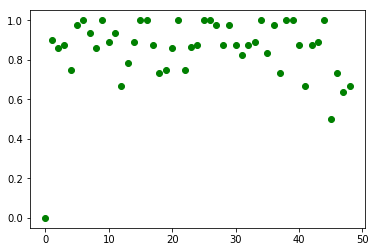

0.8513891152597968

I am going to split this region along its mean and map any values above the mean to good credit and any values below the mean to bad credit
Any outlier values will be left to random chance


In [12]:
print("Based on complexity of trends present here, I will assume that Credit Score can be accurately determined\n based on education, marriage, and dependentents,")
print()
print("A probability will be determined first and then mapped after based on the trends")

temp_list = []
rand_list = []
for i in range(0,len(df)):
    if np.isnan(df.iloc[i]["Credit_History"]):
        married = df.iloc[i]["Married"]
        temp = df[df["Married"]==married]
        gender = df.iloc[i]["Gender"]
        temp = temp[temp["Gender"]==gender]
        dependents = df.iloc[i]["Dependents"]
        temp = temp[temp["Dependents"]==dependents]
        education = df.iloc[i]["Education"]
        temp = temp[temp["Education"]==education]
        prop = df.iloc[i]["Property_Area"]
        temp = temp[temp["Property_Area"] == prop]
        if temp.empty or len(temp) == 1:
            val = np.random.choice([float(0),float(1)])
            rand_list.append(val)
        elif len(temp) > 1:
            temp_list.append(temp["Credit_History"].mean())

print()
print(rand_list)
print(temp_list)

x = [x for x in range(0,len(temp_list))]
plt.plot(x,temp_list,'go')
plt.show()

import statistics
mean = statistics.mean(temp_list)
print(mean)

print()
print("I am going to split this region along its mean and map any values above the mean to good credit and any values below the mean to bad credit")
print("Any outlier values will be left to random chance")

In [23]:
for i in range(0,len(df)):
    if np.isnan(df.iloc[i]["Credit_History"]):
        married = df.iloc[i]["Married"]
        temp = df[df["Married"]==married]
        gender = df.iloc[i]["Gender"]
        temp = temp[temp["Gender"]==gender]
        dependents = df.iloc[i]["Dependents"]
        temp = temp[temp["Dependents"]==dependents]
        education = df.iloc[i]["Education"]
        temp = temp[temp["Education"]==education]
        prop = df.iloc[i]["Property_Area"]
        temp = temp[temp["Property_Area"] == prop]
        if temp.empty or len(temp) == 1:
            val = np.random.choice([float(0),float(1)])
            df.at[i,"Credit_History"] = val
        elif len(temp) > 1:
            if df.iloc[i]["Credit_History"] > mean:
                df.at[i,"Credit_History"] = 1
            else:
                df.at[i,"Credit_History"] = 0

nulls = len(df[np.isnan(df["Credit_History"])])
total = len(df)
print("Credit History")
print("% Nulls: {}".format(round(nulls/total),2))

Credit History
% Nulls: 0


### Feature Creation

Now that the data has been fully cleaned, it can be applied to a model with the addition of 1 hot encoding existing categories as needed

I now introduce the addition of some features that may be beneficial to increasing the accuracy of a model

We begin by creating simple visualizations for each feature to see relevant trends

#### Visualization

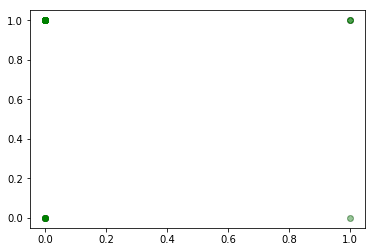

Males tend to get loans more frequently than females


In [24]:
mapping = {"Male": 0, "Female": 1}
X = df["Gender"].map(mapping)
Y = df["Loan_Status"]
plt.plot(X,Y,'go',alpha=0.01)
plt.show()

print("Males tend to get loans more frequently than females")

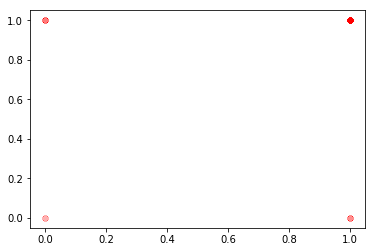

No clear distinction based on marriage here


In [15]:
X = df["Married"]
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.002)
plt.show()

print("No clear distinction based on marriage here")

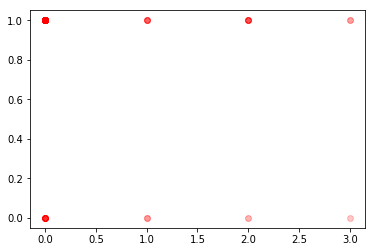

An Increasing number of dependents shows a negative trend with loan status


In [16]:
X = df["Dependents"]
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.01)
plt.show()

print("An Increasing number of dependents shows a negative trend with loan status")

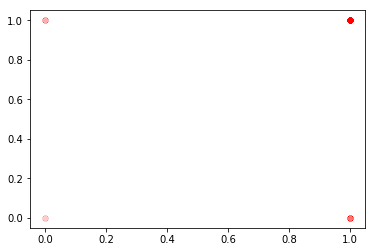

Having a degree is better than not having a degree


In [17]:
mapping = {"Graduate": 1, "Not Graduate": 0}
X = df["Education"].map(mapping)
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.002)
plt.show()

print("Having a degree is better than not having a degree")

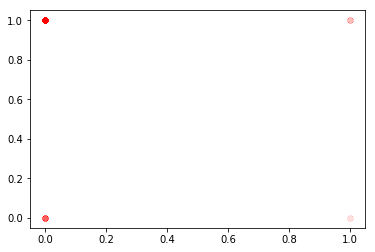

Being self-employed is bad across the board


In [18]:
X = df["Self_Employed"]
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.005)
plt.show()

print("Being self-employed is bad across the board")

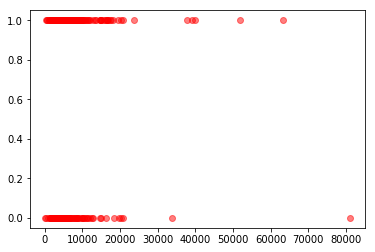

There is a clear clustering of data around the lower income regions
This could just be a result of the type of crowd that came to this bank


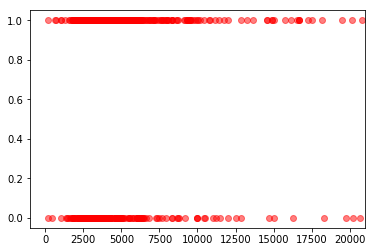

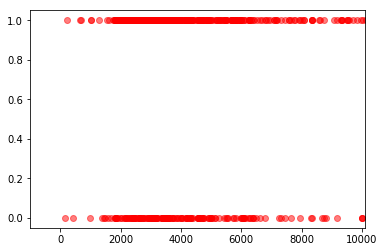

In [19]:
X = df["ApplicantIncome"]
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.5)
plt.show()

print("There is a clear clustering of data around the lower income regions")
print("This could just be a result of the type of crowd that came to this bank")

plt.figure()
plt.plot(X,Y,'ro',alpha=0.5)
plt.axis([-1000,21000,-0.05,1.05])
plt.show()

plt.figure()
plt.plot(X,Y,'ro',alpha=0.5)
plt.axis([-1000,10100,-0.05,1.05])
plt.show()

### New Feature

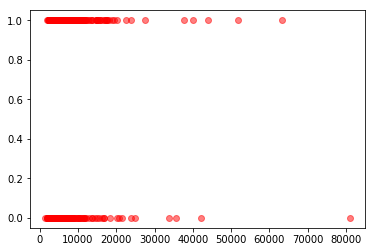

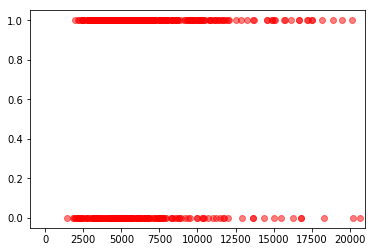

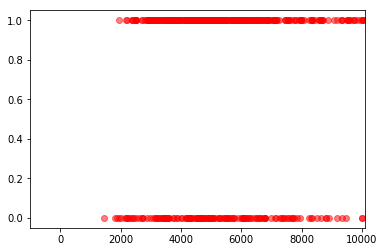

In [20]:
df["CombinedIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
X = df["CombinedIncome"]
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.5)
plt.show()

plt.figure()
plt.plot(X,Y,'ro',alpha=0.5)
plt.axis([-1000,21000,-0.05,1.05])
plt.show()

plt.figure()
plt.plot(X,Y,'ro',alpha=0.5)
plt.axis([-1000,10100,-0.05,1.05])
plt.show()

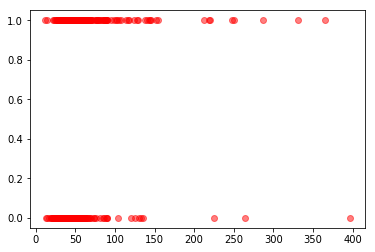

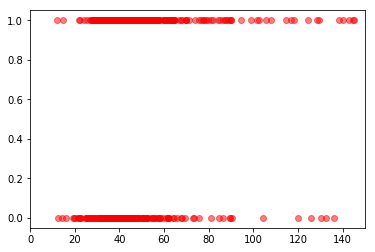

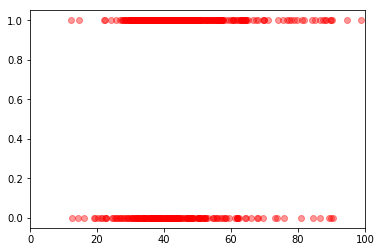

In [21]:
df["Income_Percent"] = df["CombinedIncome"]/df["LoanAmount"]

X = df["Income_Percent"]
Y = df["Loan_Status"]
plt.plot(X,Y,'ro',alpha=0.5)
plt.show()

plt.figure()
plt.plot(X,Y,'ro',alpha=0.5)

plt.axis([0,150,-0.05,1.05])
plt.show()

plt.figure()
plt.plot(X,Y,'ro',alpha=0.4)
plt.axis([0,100,-0.05,1.05])
plt.show()

In [22]:
print(df.columns.values)
print(df.head(4))

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status' 'CombinedIncome'
 'Income_Percent']
    Loan_ID Gender  Married  Dependents     Education  Self_Employed  \
0  LP001002   Male        0         0.0      Graduate            0.0   
1  LP001003   Male        1         1.0      Graduate            0.0   
2  LP001005   Male        1         0.0      Graduate            1.0   
3  LP001006   Male        1         0.0  Not Graduate            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0       134.0             360.0   
1             4583               1508       128.0             360.0   
2             3000                  0        66.0             360.0   
3             2583               2358       120.0             360.0   

   Credit_History Property_Area  Loan_Status  CombinedInc

In [27]:
df.to_csv("Loan Prediction Train - final.csv")